In [28]:
# =====================================================
# Notebook: AnalisisBasicoVacasLecheras.ipynb
# Autor: Fito Vásquez Candela
# Descripción: Análisis productivo básico de Vacas lecheras
# =====================================================

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"F:\BASES KAGGLE\MILK PRODUCTION\farm_milk_production.csv")

In [4]:
print("Vista previa de los datos:")
display(df.head())

Vista previa de los datos:


,Date,Cow_ID,Feed_kg,Temp_C,Humidity,Milking_Time_min,Milk_Liters
0,2025-06-01,C001,9.61,25.1,59,17,17.70
1,2025-06-01,C002,11.46,22.9,63,14,17.81
2,2025-06-01,C003,12.03,23.2,65,10,16.73
3,2025-06-01,C004,11.98,27.5,67,20,19.04
4,2025-06-01,C005,13.95,24.6,55,10,18.17


In [5]:
df.shape

(600, 7)

In [9]:
promedio_leche = df["Milk_Liters"].mean()
varianza_leche = df["Milk_Liters"].var()

promedio_alimento = df["Feed_kg"].mean()
varianza_alimento = df["Feed_kg"].var()

print(f"/nPromedio de producción de leche: {promedio_leche:.2f} litros")
print(f"Varianza de producción de leche: {varianza_leche:.2f}")
print(f"/nPromedio de consumo de alimento: {promedio_alimento:.2f} kg")
print(f"Varianza de consumo de alimento: {varianza_alimento:.2f}")

/nPromedio de producción de leche: 18.62 litros
Varianza de producción de leche: 5.19
/nPromedio de consumo de alimento: 11.93 kg
Varianza de consumo de alimento: 2.37


In [11]:
print("\n✅ Este análisis permite observar la relación entre la producción de leche y el consumo de alimento,")
print("identificando tendencias o posibles anomalías en el desempeño productivo del hato.")


✅ Este análisis permite observar la relación entre la producción de leche y el consumo de alimento,
identificando tendencias o posibles anomalías en el desempeño productivo del hato.


In [13]:
df["Date"]

0     2025-06-01
1     2025-06-01
2     2025-06-01
3     2025-06-01
4     2025-06-01
         ...    
595   2025-07-30
596   2025-07-30
597   2025-07-30
598   2025-07-30
599   2025-07-30
Name: Date, Length: 600, dtype: datetime64[ns]

Promedios semanales de producción y consumo:


,Date,Milk_Liters,Feed_kg
0,2025-06-01,17.745000,11.611000
1,2025-06-08,18.908429,12.046714
2,2025-06-15,18.845143,12.104000
3,2025-06-22,18.262286,11.738286
4,2025-06-29,18.529429,11.974714
5,2025-07-06,18.562000,11.921143
6,2025-07-13,18.898857,12.002571
7,2025-07-20,18.473000,11.763286
8,2025-07-27,18.460286,11.867714
9,2025-08-03,19.046333,12.186000


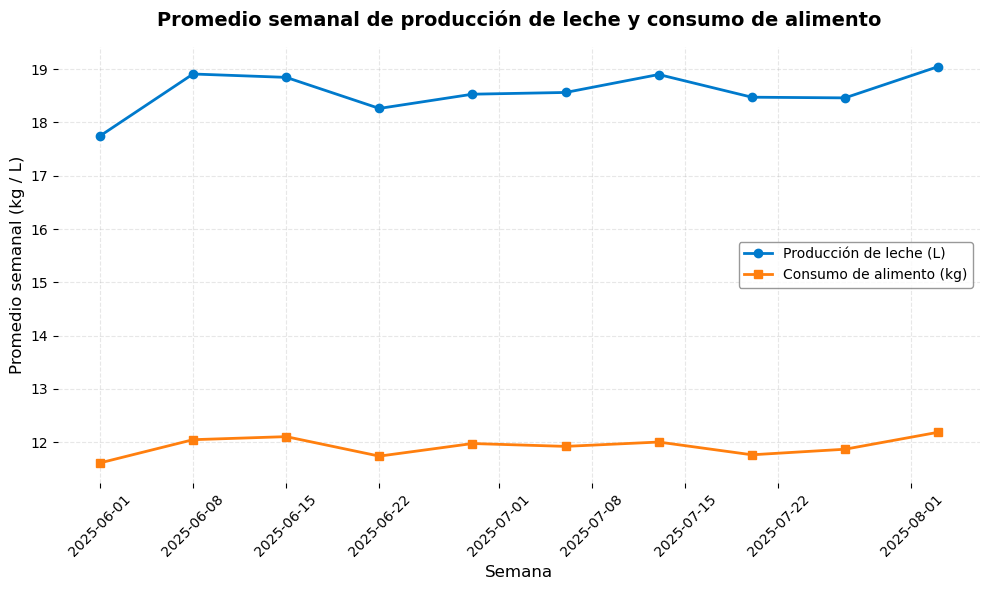

In [15]:
# Asegurarte de que la columna Date sea de tipo fecha
df["Date"] = pd.to_datetime(df["Date"])

# Agrupar por semana y calcular los promedios
df_semanal = df.resample('W', on='Date')[["Milk_Liters", "Feed_kg"]].mean().reset_index()

print("Promedios semanales de producción y consumo:")
display(df_semanal)

# === Gráfico profesional de evolución semanal ===
plt.figure(figsize=(10,6))

# Línea de leche
plt.plot(df_semanal["Date"], df_semanal["Milk_Liters"], 
         marker="o", linewidth=2, color="#007ACC", label="Producción de leche (L)")

# Línea de alimento
plt.plot(df_semanal["Date"], df_semanal["Feed_kg"], 
         marker="s", linewidth=2, color="#FF7F0E", label="Consumo de alimento (kg)")

# Título y etiquetas
plt.title("Promedio semanal de producción de leche y consumo de alimento", 
          fontsize=14, fontweight="bold", pad=15)
plt.xlabel("Semana", fontsize=12)
plt.ylabel("Promedio semanal (kg / L)", fontsize=12)

# Ajustes visuales
plt.grid(alpha=0.3, linestyle="--")
plt.gca().set_facecolor("#F9F9F9")
plt.xticks(rotation=45)
plt.legend(frameon=True, facecolor="white", edgecolor="gray", fontsize=10)
plt.tight_layout()
plt.box(False)

# Mostrar gráfico
plt.show()

Vista previa de la relación consumo-producción:


,Date,Cow_ID,Feed_kg,Temp_C,Humidity,Milking_Time_min,Milk_Liters,Mes,Relacion_CP
0,2025-06-01,C001,9.61,25.1,59,17,17.70,June,0.542938
1,2025-06-01,C002,11.46,22.9,63,14,17.81,June,0.643459
2,2025-06-01,C003,12.03,23.2,65,10,16.73,June,0.719068
3,2025-06-01,C004,11.98,27.5,67,20,19.04,June,0.629202
4,2025-06-01,C005,13.95,24.6,55,10,18.17,June,0.767749



Promedios semanales de consumo, producción y eficiencia:


,Date,Feed_kg,Milk_Liters,Relacion_CP
0,2025-06-01,11.611000,17.745000,0.656281
1,2025-06-08,12.046714,18.908429,0.638273
2,2025-06-15,12.104000,18.845143,0.643634
3,2025-06-22,11.738286,18.262286,0.644784
4,2025-06-29,11.974714,18.529429,0.648066
5,2025-07-06,11.921143,18.562000,0.645933
6,2025-07-13,12.002571,18.898857,0.634126
7,2025-07-20,11.763286,18.473000,0.638681
8,2025-07-27,11.867714,18.460286,0.644107
9,2025-08-03,12.186000,19.046333,0.643130


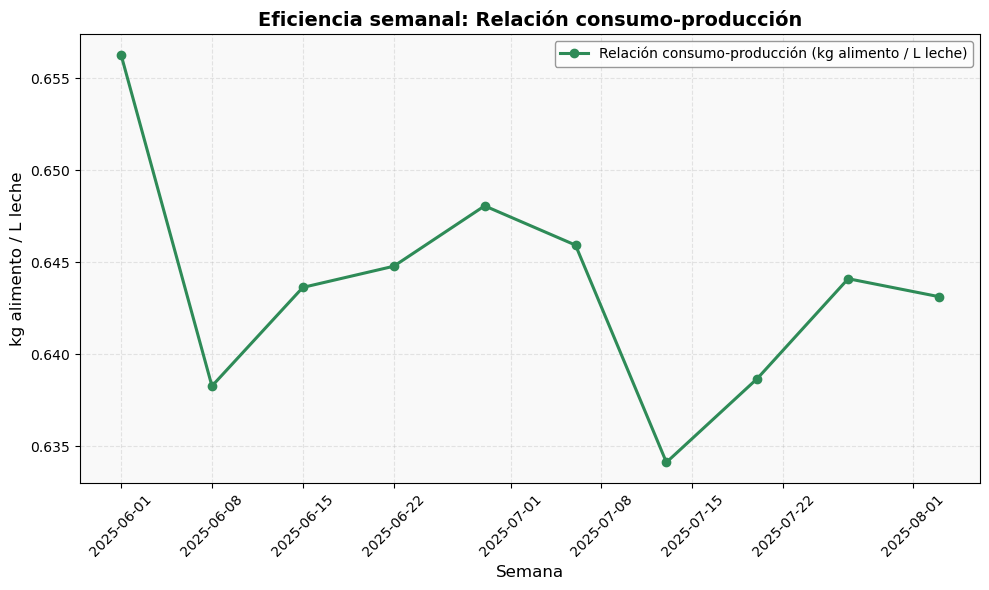

In [16]:
# Asegurar formato de fecha
df["Date"] = pd.to_datetime(df["Date"])

# === Calcular relación consumo-producción diaria ===
df["Relacion_CP"] = df["Feed_kg"] / df["Milk_Liters"]

print("Vista previa de la relación consumo-producción:")
display(df.head())

# === Agrupar por semana para suavizar variaciones ===
df_semana = df.resample('W', on='Date')[["Feed_kg", "Milk_Liters", "Relacion_CP"]].mean().reset_index()

# === Mostrar resumen ===
print("\nPromedios semanales de consumo, producción y eficiencia:")
display(df_semana)

# === Gráfico de eficiencia semanal ===
plt.figure(figsize=(10,6))
plt.plot(df_semana["Date"], df_semana["Relacion_CP"], 
         marker="o", color="#2E8B57", linewidth=2.2, label="Relación consumo-producción (kg alimento / L leche)")

plt.title("Eficiencia semanal: Relación consumo-producción", fontsize=14, fontweight="bold")
plt.xlabel("Semana", fontsize=12)
plt.ylabel("kg alimento / L leche", fontsize=12)
plt.grid(alpha=0.3, linestyle="--")
plt.gca().set_facecolor("#F9F9F9")
plt.legend(frameon=True, facecolor="white", edgecolor="gray", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()